In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)

In [17]:
quality_name_map = {
    "crowdlab": "CROWDLAB",
    "label_quality_score": "Label Quality Score",
    "agreement": "Agreement",
    "active_label_cleaning": "Active Label Cleaning",
    "empirical_bayes": "Empirical Bayes",
    "no_perannotator_weights": "No Perannotator Weights",
    "dawid_skene": "Dawid-Skene",
    "glad": "GLAD",
    "dawid_skene_with_model": "Dawid-Skene with Model",
    "glad_with_model": "GLAD with Model"
}

consensus_name_map = {
    "majority": "Majority Vote (Agreement)",
    "dawid_skene": "Dawid-Skene",
    "glad": "GLAD",
    "dawid_skene_with_model": "Dawid-Skene with Model",
    "glad_with_model": "GLAD with Model",
    "crowdlab": "CROWDLAB"
}

In [18]:
results = pd.read_csv("benchmark_results/results.csv")

results_qual_score = results[results["consensus_method"] != "crowdlab"][
        [
            "dataset",
            "model",
            "quality_method",
            "consensus_quality_auroc",
            "consensus_quality_auprc", 
            "annotator_quality_spearman_corr"
        ]
    ]

results_accuracy = results[
        [
            "dataset",
            "model",
            "consensus_method",
            "consensus_labels_accuracy",
        ]
    ].drop_duplicates(ignore_index=True)

results_qual_score["quality_method"] = results_qual_score["quality_method"].apply(lambda s: quality_name_map[s])
results_accuracy["consensus_method"] = results_accuracy["consensus_method"].apply(lambda s: consensus_name_map[s])

In [19]:
worst_results = results_qual_score[results_qual_score["dataset"] == "worst_annotators"]

resnet18_worst = worst_results[worst_results["model"] == "resnet18"]
swin_worst = worst_results[worst_results["model"] == "swin"]

In [20]:
swin_worst.sort_values("quality_method")

,dataset,model,quality_method,consensus_quality_auroc,consensus_quality_auprc,annotator_quality_spearman_corr
14,worst_annotators,swin,Active Label Cleaning,0.865599,0.444000,0.775952
13,worst_annotators,swin,Agreement,0.676894,0.134098,0.711976
11,worst_annotators,swin,CROWDLAB,0.960857,0.665710,0.758250
17,worst_annotators,swin,Dawid-Skene,0.754560,0.396864,0.596159
19,worst_annotators,swin,Dawid-Skene with Model,0.889684,0.270366,0.720756
15,worst_annotators,swin,Empirical Bayes,0.933657,0.394404,0.719866
18,worst_annotators,swin,GLAD,0.881411,0.515947,0.667293
20,worst_annotators,swin,GLAD with Model,0.930289,0.414750,0.762700
12,worst_annotators,swin,Label Quality Score,0.940896,0.608456,0.775952
16,worst_annotators,swin,No Perannotator Weights,0.957250,0.654936,0.747999


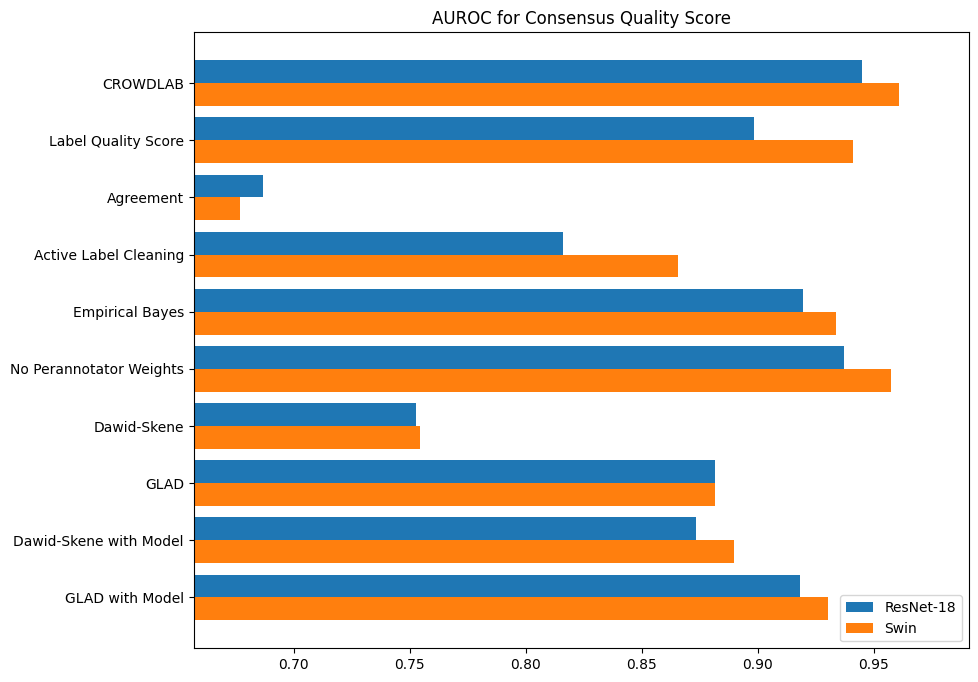

In [21]:
x = np.arange(len(resnet18_worst["quality_method"]) - 1, -1, -1)
width = 0.4 # the width of the bars

plt.barh(x + width/2, resnet18_worst["consensus_quality_auroc"], width, label="ResNet-18") 
plt.barh(x - width/2, swin_worst["consensus_quality_auroc"], width, label="Swin") 

plt.xlim(np.min(resnet18_worst["consensus_quality_auroc"]) - 0.03, min(np.max(swin_worst["consensus_quality_auroc"]) + 0.03, 1))
plt.yticks(x, resnet18_worst["quality_method"])
plt.title("AUROC for Consensus Quality Score")
plt.legend()

plt.show()

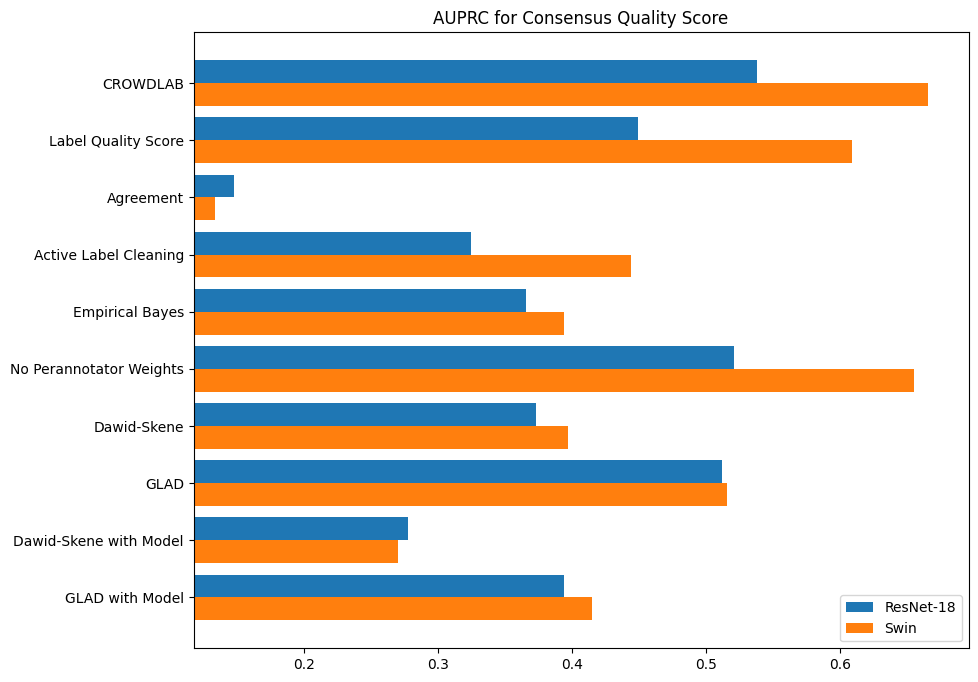

In [22]:
x = np.arange(len(resnet18_worst["quality_method"]) - 1, -1, -1)
width = 0.4 # the width of the bars

plt.barh(x + width/2, resnet18_worst["consensus_quality_auprc"], width, label="ResNet-18") 
plt.barh(x - width/2, swin_worst["consensus_quality_auprc"], width, label="Swin") 

plt.xlim(np.min(resnet18_worst["consensus_quality_auprc"]) - 0.03, min(np.max(swin_worst["consensus_quality_auprc"]) + 0.03, 1))
plt.yticks(x, resnet18_worst["quality_method"])
plt.title("AUPRC for Consensus Quality Score")
plt.legend()

plt.show()

In [23]:
resnet18_worst

,dataset,model,quality_method,consensus_quality_auroc,consensus_quality_auprc,annotator_quality_spearman_corr
0,worst_annotators,resnet18,CROWDLAB,0.944894,0.537992,0.721502
1,worst_annotators,resnet18,Label Quality Score,0.898247,0.448911,0.701059
2,worst_annotators,resnet18,Agreement,0.686879,0.147983,0.688119
3,worst_annotators,resnet18,Active Label Cleaning,0.816071,0.325016,0.701059
4,worst_annotators,resnet18,Empirical Bayes,0.919592,0.365623,0.709135
5,worst_annotators,resnet18,No Perannotator Weights,0.937207,0.520520,0.712983
6,worst_annotators,resnet18,Dawid-Skene,0.752892,0.373237,0.596159
7,worst_annotators,resnet18,GLAD,0.881579,0.512185,0.667293
8,worst_annotators,resnet18,Dawid-Skene with Model,0.873320,0.277819,0.664029
9,worst_annotators,resnet18,GLAD with Model,0.918314,0.394088,0.718595


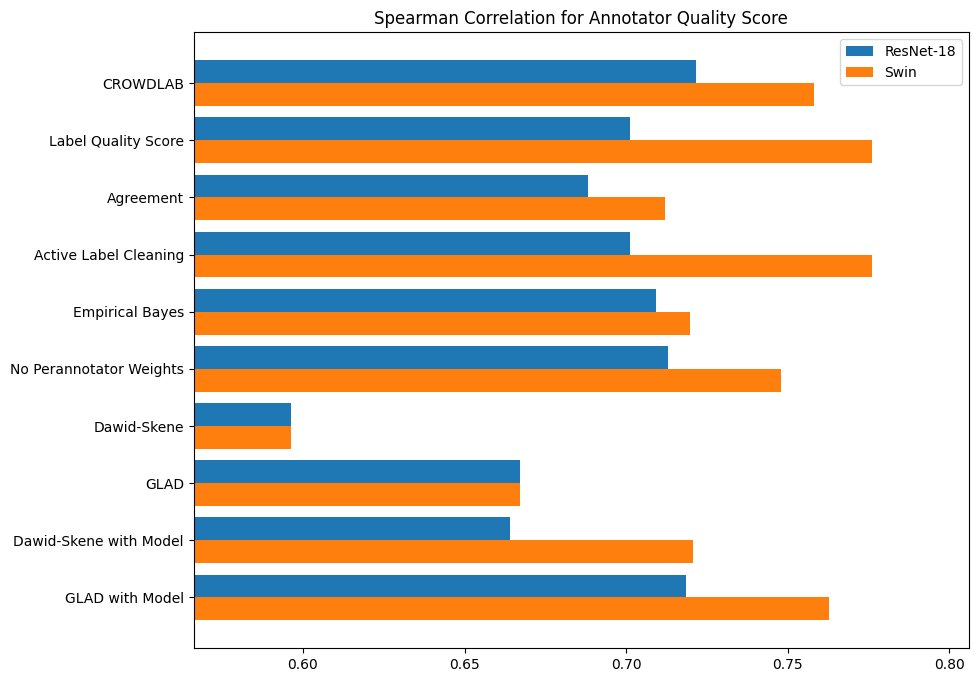

In [24]:
x = np.arange(len(resnet18_worst["quality_method"]) - 1, -1, -1)
width = 0.4 # the width of the bars

plt.barh(x + width/2, resnet18_worst["annotator_quality_spearman_corr"], width, label="ResNet-18") 
plt.barh(x - width/2, swin_worst["annotator_quality_spearman_corr"], width, label="Swin") 

plt.xlim(np.min(resnet18_worst["annotator_quality_spearman_corr"]) - 0.03, min(np.max(swin_worst["annotator_quality_spearman_corr"]) + 0.03, 1))
plt.yticks(x, resnet18_worst["quality_method"])
plt.title("Spearman Correlation for Annotator Quality Score")
plt.legend()

plt.show()

In [25]:
worst_acc = results_accuracy[results_accuracy["dataset"] == "worst_annotators"]

resnet18_worst_acc = worst_acc[worst_acc["model"] == "resnet18"]
swin_worst_acc = worst_acc[worst_acc["model"] == "swin"]

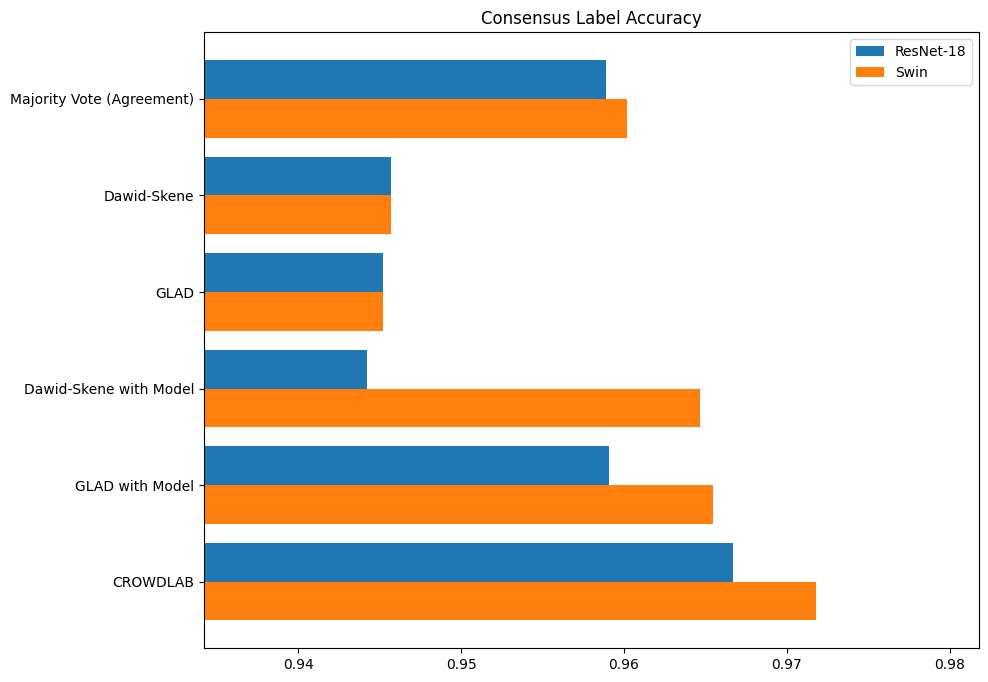

In [26]:
x = np.arange(len(resnet18_worst_acc["consensus_method"]) - 1, -1, -1)
width = 0.4 # the width of the bars

plt.barh(x + width/2, resnet18_worst_acc["consensus_labels_accuracy"], width, label="ResNet-18") 
plt.barh(x - width/2, swin_worst_acc["consensus_labels_accuracy"], width, label="Swin") 

plt.xlim(np.min(resnet18_worst_acc["consensus_labels_accuracy"]) - 0.01, min(np.max(swin_worst_acc["consensus_labels_accuracy"]) + 0.01, 1))
plt.yticks(x, resnet18_worst_acc["consensus_method"])
plt.title("Consensus Label Accuracy")
plt.legend()

plt.show()

In [27]:
# fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)

# datasets = ["worst_annotators", "uniform_1_5", "complete"]
# models = ["resnet18", "swin", "truelabels"]

# for i in range(len(datasets)):
#     res_dataset = results[results["dataset"] == datasets[i]]

#     for j in range(len(models)):
#         res_model = res_dataset[res_dataset["model"] == models[j]]

#         # axs[i, j].plot(res_model["consensus_quality_auroc"], res_model["quality_method"], marker=".", linestyle="")
#         axs[i, j].barh(res_model["quality_method"], res_model["consensus_quality_auroc"])
#         axs[i, j].set_title(f"{datasets[i]} - {models[j]}")

# for ax in axs.flat:
#     ax.label_outer()